202000566


In [1]:
import os
import torch
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from cvxopt import matrix as cvxmat
from cvxopt import solvers as solver
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns

C:\Users\Mohand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [3]:
iris = iris[:100]
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [4]:
Y = iris.species
Y = Y[0:100]
count = 0
while count != len(Y):
    if Y[count] == 'setosa':
        Y[count] = 1
    else:
        Y[count] = -1
    count += 1

In [5]:
X = iris.drop('species', axis = 1)
X = X[0:100]

In [6]:
X2 = X.drop('petal_length', axis = 1)
X2 = X2.drop('petal_width', axis = 1)

In [7]:
X = X.to_numpy()
Y = Y.to_numpy()
X2 = X2.to_numpy()
Y = Y.astype(np.double)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.3, random_state = 44)

In [9]:
X.shape[1]


4

<img src="https://editor.analyticsvidhya.com/uploads/947387.png" width="500" margin-left= auto  margin-left=auto>

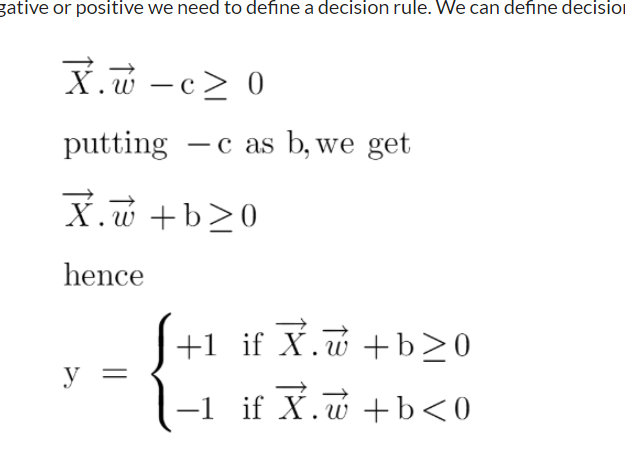

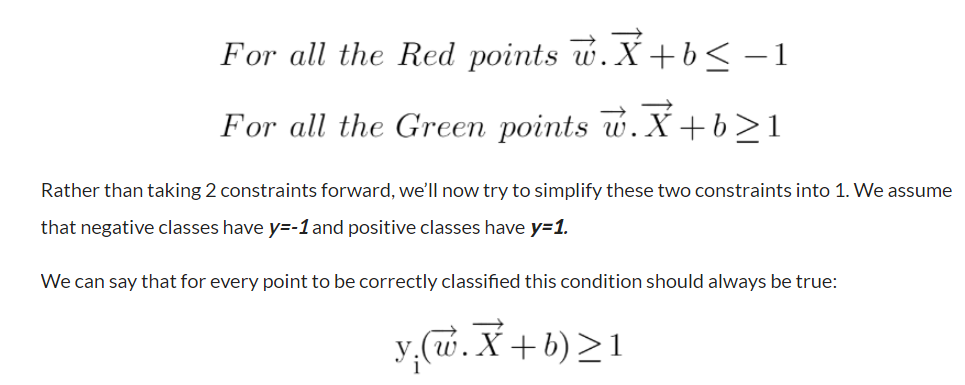


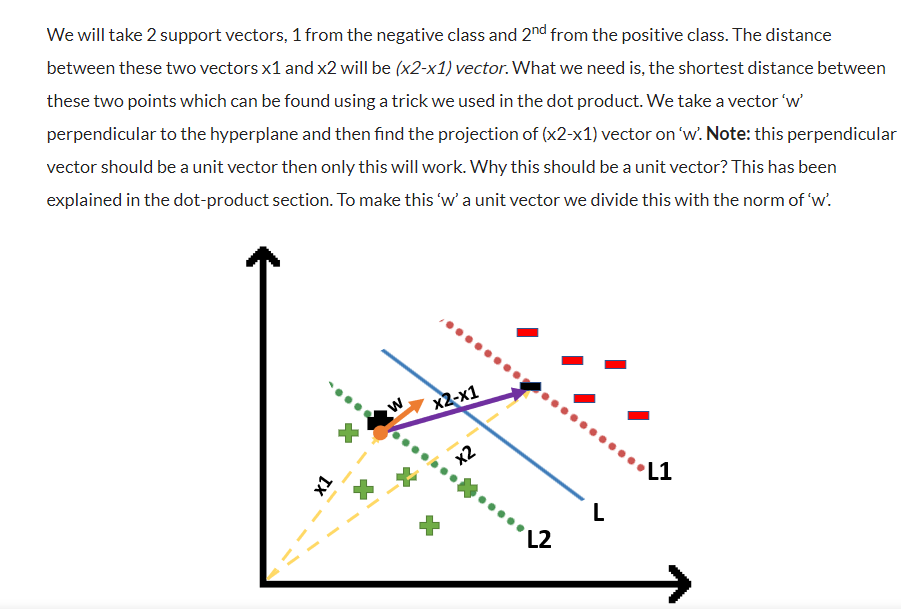

In [10]:
def svm_function(X, Y):
    
    n = X.shape[0]
    d = X.shape[1]

    P = np.zeros((d + 1, d + 1))
    P[1:, 1:] = np.eye(d)
    P_cvxopt = cvxopt.matrix(P)
    
    q_temp = np.zeros(d + 1)
    q = cvxopt.matrix(q_temp)
    
    new_y = np.reshape(Y, (-1, 1))
    temp_matrix = -np.insert(X, 0, np.ones(n), axis = 1) * new_y
    G_cvxopt = cvxopt.matrix(temp_matrix)
    
    h_temp = -np.ones(n)
    h = cvxopt.matrix(h_temp)
    
    calculate = cvxopt.solvers.qp(P_cvxopt, q, G_cvxopt, h)


    print(P_cvxopt)
    
    return calculate
solution = svm_function(X_train, Y_train)

     pcost       dcost       gap    pres   dres
 0:  1.1477e+00  3.5176e+01  2e+02  2e+00  5e+01
 1:  7.3095e+00 -1.9702e+01  8e+01  8e-01  2e+01
 2:  1.9093e+01 -1.0546e+01  7e+01  4e-01  1e+01
 3:  3.1620e+01  1.5828e+01  2e+01  1e-01  3e+00
 4:  3.3561e+01  3.2481e+01  2e+00  7e-03  2e-01
 5:  3.3793e+01  3.3781e+01  2e-02  7e-05  2e-03
 6:  3.3795e+01  3.3795e+01  2e-04  7e-07  2e-05
 7:  3.3795e+01  3.3795e+01  2e-06  7e-09  2e-07
 8:  3.3795e+01  3.3795e+01  2e-08  7e-11  2e-09
Optimal solution found.
[ 0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  1.00e+00]



In [11]:
b_and_w = np.array(solution['x'])
b = b_and_w[0][0]
w = b_and_w[1:] 
w.shape
print("W = {}".format(w))

W = [[-6.31578947]
 [ 5.26315789]]


In [12]:
print("b = {}".format(b))

b = 17.315789473215474


In [13]:
def plot_svm_graph(W, X, Y, b):
    i = 0
    while i != len(X):
        if Y[i] > 0:
            plt.scatter(X[i, 0], X[i,1], color = 'b')
        else:
            plt.scatter(X[i, 0], X[i,1], color = 'r')
        i += 1
    x_plot = np.arange(4.5, 6.5, 0.25)
    y_predict = -(b + x_plot*W[0])/W[1]
    distance = 1/np.linalg.norm(W)
    upper_margin = y_predict + distance
    lower_margin = y_predict - distance
    
    plt.plot(x_plot, y_predict)
    plt.plot(x_plot, upper_margin)
    plt.plot(x_plot, lower_margin)
    plt.legend(('predicted', 'upper_margin', 'lower_margin'))
    plt.show()

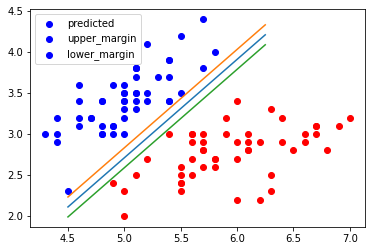

In [14]:
plot_svm_graph(w, X, Y, b)


In [15]:
def generate_data(n_samples=200, n_features=2, centers=2, center_box=(-15., 15.), cluster_std=1.):

    X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers,
                      center_box=center_box, cluster_std=cluster_std)
    y[y == 0] = -1 
    y = y.astype(float)
    
    st = StandardScaler()
    X_s = st.fit_transform(X)
    return X_s, y

In [16]:
X, y = generate_data()

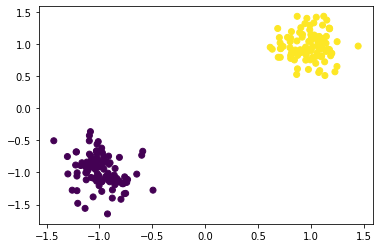

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Here are two linearly separable clusters that we will use to test the Hard Margin SVM method.

In [18]:
def linear_kernel(X_1, X_2):
    """Computes a dot product between two vectors"""
    return np.dot(X_1, X_2)

In [19]:
class SupportVectorClassifier():

    def __init__(self, kernel, C=None):
       
        self.kernel = kernel
        self.C = C
        
    def fit(self, X, y):
 
        # Building the cvxopt matrices
        if len(y.shape) == 1:
            y = np.expand_dims(y, axis=1)
        y = y.astype(float)
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i, :], X[j, :])
        q = cvxmat(np.ones((n_samples, 1)) * -1.)
        A = cvxmat(y.T)
        b = cvxmat(0.)
        P = cvxmat(np.outer(y, y) * K)
        
        if self.C is None:
            G = cvxmat(np.eye(n_samples) * -1.)
            h = cvxmat(np.zeros((n_samples, 1)))
        else:
            col_1 = np.eye(n_samples) * -1.
            col_2 = np.identity(n_samples)
            G = cvxmat(np.vstack((col_1, col_2)))
            
            col_1 = np.zeros(n_samples)
            col_2 = np.ones(n_samples) * self.C
            h = cvxmat(np.hstack((col_1, col_2)))
        
        # Compute the convex optimization
        sigma = np.array(solver.qp(P, q, G, h, A, b)['x'])
        
        # Gather support vectors
        sv_idx = sigma > 1e-5
        self.sv_sigma = np.expand_dims(sigma[sv_idx], axis=1)
        sv_idx = np.squeeze(sv_idx)
        self.sv = X[sv_idx, :]
        self.sv_y = y[sv_idx]
       
     
        if self.kernel == linear_kernel:
            w = np.sum(self.sv_y * self.sv_sigma * self.sv, axis=0)
            self.w = np.expand_dims(w, axis=1)
        else:
            self.w = None
        
        
        idx = sv_idx.astype(int).nonzero()[0]
        b = 0
        sv_sigma_flat = self.sv_sigma.flatten()
        sv_y_flat = self.sv_y.flatten()
        for i in range(len(idx)):
            b += self.sv_y[i]
            b -= np.sum(sv_sigma_flat * sv_y_flat * K[idx[i], sv_idx])
        b /= len(idx)
        self.b = b

    def project(self, X):
       
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            pred = np.zeros(X.shape[0])
            for i in range(X.shape[0]):
                cur_pred = 0
                for j in range(self.sv_sigma.shape[0]):
                    cur_pred += self.sv_sigma[j] * self.sv_y[j] * self.kernel(X[i], self.sv[j])
                pred[i] = cur_pred
            return pred + self.b
    
    def predict(self, X):
        return np.sign(self.project(X))

## Hard Margin Classifier with Linear Kernel (bouns)

In [20]:
svc = SupportVectorClassifier(linear_kernel)
svc.fit(X, y)

     pcost       dcost       gap    pres   dres
 0: -3.2564e+00 -5.1327e+00  4e+02  2e+01  1e+00
 1: -3.2388e-01 -1.5736e+00  1e+01  7e-01  5e-02
 2: -1.6969e-02 -1.1996e+00  1e+00  1e-16  6e-16
 3: -3.0011e-01 -5.9946e-01  3e-01  4e-17  4e-16
 4: -4.0793e-01 -6.0937e-01  2e-01  6e-17  3e-16
 5: -5.4420e-01 -5.6982e-01  3e-02  2e-17  4e-16
 6: -5.6283e-01 -5.6325e-01  4e-04  4e-16  4e-16
 7: -5.6317e-01 -5.6318e-01  4e-06  1e-16  4e-16
 8: -5.6317e-01 -5.6318e-01  4e-08  2e-16  4e-16
Optimal solution found.


In [21]:
pred = svc.predict(X)

In [22]:


# Set the learning rate and the regularization parameter
eta = 1 # learning rate
lam = 0.1 # regularization parameter

# Initialize the error rate
error = 1.0


# Calculate the VC dimension
vc = len(np.where(w != 0)[0])

# Test the classifier
y_pred = np.sign(np.dot(X, w) + b)

# Calculate the error rate
error = 1.0 - np.mean(y_pred==y)

In [23]:
# Compare the VC dimension to the number of training data points
if vc < len(X):
    print("The VC dimension is smaller than the number of training data points.")
else:
    print("The VC dimension is larger than the number of training data points.")

# Compare the VC dimension to the number of dimensions in the data
if vc < X.shape[1]:
    print("The VC dimension is smaller than the number of dimensions in the data.")
else:
    print("The VC dimension is larger than the number of dimensions in the data.")

# Compare the VC dimension to the error rate
if vc < error:
    print("The VC dimension is smaller than the error rate.")
else:
    print("The VC dimension is larger than the error rate.")

The VC dimension is smaller than the number of training data points.
The VC dimension is larger than the number of dimensions in the data.
The VC dimension is larger than the error rate.


In [24]:
def plot_svc(X, y, svc, pred, plot_sv=True):
    """Plots the SVC hyperplane"""
    plt.scatter(X[:, 0], X[:, 1], c=y)
    if plot_sv:
        plt.scatter(svc.sv[:, 0], svc.sv[:, 1])
    axis_min, axis_max = plt.gca().get_xlim()
    
    w = svc.w
    
    a = -w[0] / w[1]
    xx = np.linspace(axis_min, axis_max)
    yy = a * xx - svc.b[0] / w[1]

    # Plot the hyperplane
    b = svc.sv[np.where(svc.sv_y == 1.)[0]][0]
    
    yy_down = a * xx + (b[1] - a * b[0])
    b = svc.sv[np.where(svc.sv_y == -1.)[0]][0]
    yy_up = a * xx + (b[1] - a * b[0])
    
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

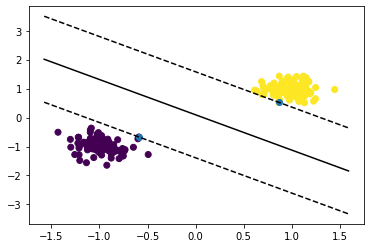

In [25]:
plot_svc(X, y, svc, pred)

The SVC separates very well the data, the support vectors appear in blue.

## Soft Margin Classifier with Linear Kernel 

The soft margin classifier places the classification plane in the middle of the two cluster in the direction of highest variable. Well done !

In [26]:
def generate_non_linear(mean_1, mean_2, mean_3, mean_4, cov):

    X_1 = np.random.multivariate_normal(mean_1, cov, 50)
    X_1 = np.vstack((X_1, np.random.multivariate_normal(mean_3, cov, 50)))
    y_1 = np.ones(len(X_1))
    X_2 = np.random.multivariate_normal(mean_2, cov, 50)
    X_2 = np.vstack((X_2, np.random.multivariate_normal(mean_4, cov, 50)))
    y_2 = np.ones(len(X_2)) * -1
    
    X = np.vstack([X_1, X_2])
    y = np.hstack([y_1, y_2])
    X = StandardScaler().fit_transform(X)
    return X, y

In [27]:
X, y = generate_non_linear(mean_1=[-2, 2], mean_2=[1, -1],
                           mean_3=[4, -4], mean_4=[-4, 4],
                           cov=[[1.0,0.8], [0.8, 1.0]])

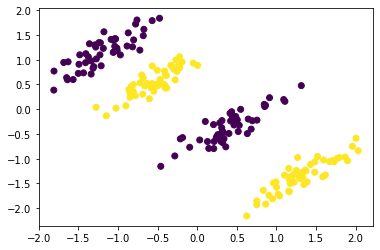

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Evn the linear soft margin model cannot fit well this data. For solving this problem we will use the kernel radial basis function (RBF).

In [29]:
def polynomial_kernel(X_1, X_2, p):
    """Computes the polynomial kernel where p is the degree of the polynomial"""
    return (1 + np.dot(X_1, X_2)) ** p

def kernel_rbf(X_1, X_2, sigma=1.0):
    """Computes the kernel RBF where sigma is the bandwith"""
    return np.exp(-np.linalg.norm(X_1 - X_2) ** 2 / (2 * sigma ** 2))

In [30]:
svc_rbf = SupportVectorClassifier(kernel_rbf)
svc_rbf.fit(X, y)

     pcost       dcost       gap    pres   dres
 0: -1.7488e+01 -5.4218e+01  5e+02  2e+01  2e+00
 1: -1.0943e+01 -6.0883e+01  1e+02  5e+00  5e-01
 2: -1.0798e+01 -4.7441e+01  5e+01  7e-01  7e-02
 3: -1.6704e+01 -5.0133e+01  4e+01  4e-01  4e-02
 4: -2.5408e+01 -3.9754e+01  2e+01  2e-01  2e-02
 5: -3.2143e+01 -3.6561e+01  4e+00  1e-03  1e-04
 6: -3.4941e+01 -3.5646e+01  7e-01  2e-14  5e-15
 7: -3.5515e+01 -3.5563e+01  5e-02  6e-15  5e-15
 8: -3.5556e+01 -3.5558e+01  2e-03  8e-15  5e-15
 9: -3.5558e+01 -3.5558e+01  5e-05  1e-14  6e-15
10: -3.5558e+01 -3.5558e+01  2e-06  1e-14  5e-15
Optimal solution found.


In [31]:
pred = svc_rbf.predict(X)

In [32]:
def plot_svc_rbf(X, y, svc):
    """Plots the hyperplane and margins of a SVC with rbf kernel"""
    plt.scatter(X[:, 0], X[:, 1], c=y)
    sv = svc.sv
    plt.scatter(sv[:, 0], sv[:, 1], c='g')
    axis_min, axis_max = plt.gca().get_xlim()
    
    X1, X2 = np.meshgrid(np.linspace(axis_min, axis_max, 50), np.linspace(axis_min, axis_max,50))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = svc.project(X).reshape(X1.shape)
    plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')
    
    plt.axis("tight")
    plt.show()
    

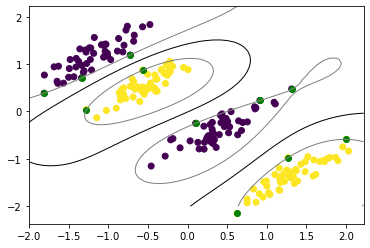

In [33]:
plot_svc_rbf(X, y, svc_rbf)